In [1]:
#Create seperate python file for class
#Create this as python file (.py).

#Third Party Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
class modelling():
    
    #To read the data file
    def __init__(self,data_location):
        self.data=pd.read_csv(data_location)
        print("Got the data! Start with the analysis and modelling work!\n")
        
    #To return the data    
    def getData(self):
        df= self.data
        return df

    #Check for nulls in each column
    def checknull(self,df):
        print("The number of null values in each column are:")
        print(df.isnull().sum())

    #For Statistical Anlaysis of each column
    def stats(self,df):
        print("\nStatistical Analysis of each column:")
        print(df.describe())

    #To get the correlation matrix and see how each column is correlated with other columns
    def corr_matrix(self,df):
        print("\nCorrelation Matrix:")
        corr_matrix=df.corr()
        print(corr_matrix)
        sns.heatmap(corr_matrix)
        plt.show(block=False)
        plt.pause(3)
        plt.close()
        
    #To perform undersampling on unblanaced data    
    def balancing_data(self,dataframe):

        #To create randomly shuffled data instances during each run
        shuffled_df= dataframe.sample(frac=1).reset_index()

        #Seperate target values '0' & '1'
        non_target_data = shuffled_df[shuffled_df.Target == 0]
        target_data = shuffled_df[shuffled_df.Target == 1]

        no_of_samples = round(non_target_data.shape[0] * 0.1)

        #Reduce target value '0' rows to match target value '1' rows
        non_target_data_new = resample(non_target_data, n_samples=no_of_samples, random_state=3)
        target_model_data_after_balancing = pd.concat([non_target_data_new, target_data],axis=0)

        #Creating X (feature set data columns) and Y (Target data column)
        x_target_model_data_after_balancing = target_model_data_after_balancing.drop('Target', axis=1)
        y_target_model_data_after_balancing = target_model_data_after_balancing.Target
        y_target_model_data_after_balancing = y_target_model_data_after_balancing.astype(int)

        ros = RandomOverSampler(random_state=44)

        #Creating equal number of rows for each target value ('0' & '1') for balance
        x,y = ros.fit_resample(x_target_model_data_after_balancing, y_target_model_data_after_balancing)

        #Creating x and y dataframes
        x=pd.DataFrame(data=x)
        y=pd.DataFrame(data=y)
        return x,y

    #Manual train and test data split 
    def train_test_data_split(self,x,y):
        x_train_len=round(0.85*len(x))
        y_train_len=round(0.85*len(y))
        x_train=x.iloc[0:x_train_len]
        x_test=x.iloc[x_train_len:]
        y_train=y.iloc[0:y_train_len]
        y_train = np.ravel(y_train)
        y_test=y.iloc[y_train_len:]
        y_test = np.ravel(y_test)

        return x_train, x_test, y_train, y_test
    
    #To get the accuracy, precision, recall,& f1 scores of each Machine Learning Model
    def evaluation_metrics(self,test_y,pred_y):
        accuracy_score=round(metrics.accuracy_score(test_y,pred_y),2)
        precision_score = round(metrics.precision_score(test_y,pred_y),2)
        recall_score = round(metrics.recall_score(test_y,pred_y),2)
        f1_score = round(metrics.f1_score(test_y,pred_y),2)
        
        return accuracy_score, precision_score, recall_score, f1_score
    
    #To plot the confusion matrix
    def plot_confusion_matrix(self,actual_y, pred_y, model_name):
        cm = metrics.confusion_matrix(actual_y, pred_y)
        plt.clf()
        plt.imshow(cm, cmap='Pastel1')
        TargetNames = ['No Heart Disease','Heart Disease']
        plt.title(f'Confusion Matrix - {model_name}')
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        ticks = [0,1]
        plt.xticks(ticks, TargetNames, rotation=45)
        plt.yticks(ticks, TargetNames)
        s = [['TN','FP'], ['FN', 'TP']]

        for i in range(2):
            for j in range(2):
                plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10, ha="center")
        plt.show(block=False)
        plt.pause(3)
        plt.close()

In [3]:
#Creating an object of the class modelling by passing data file location as argument
data= modelling(r'heart_data.csv')

Got the data! Start with the analysis and modelling work!



In [4]:
#Returns the data in the form of dataframe
df= data.getData()

In [5]:
#Check for nulls in each column
data.checknull(df)

The number of null values in each column are:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [6]:
#Perform statistical analysis on each column
data.stats(df)


Statistical Analysis of each column:
       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
m

In [7]:
#Change Column Names to names that are easily understandable
df=df.rename(columns={"HeartDiseaseorAttack":"Target","HighBP":"High BP?","HighChol":"High Cholesterol?","CholCheck":"Cholesterol Checked?","Smoker":"Smoker?","Stroke":"Had Stroke?","Diabetes":"Diabetes?","PhysActivity":"Physical Activity?","HvyAlcoholConsump":"Heavy Alcohol Consumption?","AnyHealthcare":"Any Healthcare?","NoDocbcCost":"Cannot Afford Doc?","GenHlth":"General Health","MentHlth":"Mental Health","PhysHlth":"Physical Health","DiffWalk":"Difficulty in Walking"})
x_columns=df.columns.tolist()

In [8]:
#Creating X (feature set data columns) and Y (Target data column) on the raw unbalanced data
x=df[x_columns[1:]]
y=df[[x_columns[0]]]

In [9]:
#Checking the value count for each value in the Target column to observe if the data is balanced
print(y.value_counts())

Target
0.0       229787
1.0        23893
dtype: int64



Correlation Matrix:
                              Target  High BP?  High Cholesterol?  \
Target                      1.000000  0.209361           0.180765   
High BP?                    0.209361  1.000000           0.298199   
High Cholesterol?           0.180765  0.298199           1.000000   
Cholesterol Checked?        0.044206  0.098508           0.085642   
BMI                         0.052904  0.213748           0.106722   
Smoker?                     0.114441  0.096991           0.091299   
Had Stroke?                 0.203002  0.129575           0.092620   
Diabetes?                   0.180272  0.271596           0.209085   
Physical Activity?         -0.087299 -0.125267          -0.078046   
Fruits                     -0.019790 -0.040555          -0.040859   
Veggies                    -0.039167 -0.061266          -0.039874   
Heavy Alcohol Consumption? -0.028991 -0.003972          -0.011543   
Any Healthcare?             0.018734  0.038425           0.042230   
Cannot Afford

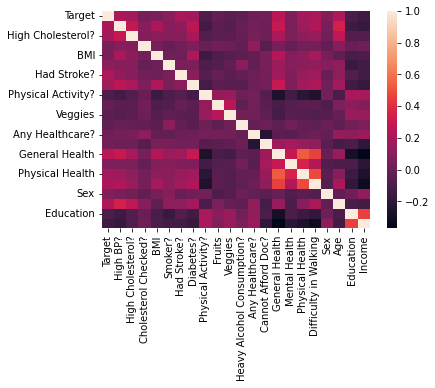

In [10]:
#To get the correlation matrix and see how each column is correlated with other columns
data.corr_matrix(df)

In [11]:
#Balance the data through undersampling
x_new, y_new=data.balancing_data(df)

In [12]:
#Creating train and test data for the balanced data manually
x_train_b, x_test_b, y_train_b, y_test_b=data.train_test_data_split(x_new,y_new)
print(y_train_b)

[0 0 0 ... 1 1 1]


In [13]:
#Creating train and test data for the unbalanced data manually
x_train_in, x_test_in, y_train_in, y_test_in=data.train_test_data_split(x,y)
print(y_train_in)

[0. 0. 0. ... 0. 0. 0.]


In [14]:
#Decision Tree Model on Balanced Data
dt = DecisionTreeClassifier().fit(x_train_b,y_train_b)
y_hat1_b = dt.predict(x_test_b)

In [15]:
#Returns the evalution metrics and creates a dictionary
accuracy_score_1, precision_score_1, recall_score_1, f1_score_1= data.evaluation_metrics(y_test_b,y_hat1_b)
Decision_Tree_metric_scores= {'Accuracy': accuracy_score_1, 'Precision': precision_score_1,'Recall': recall_score_1, 'F-1 score': f1_score_1}
print("\nThe performance of the Decision Tree Model:")
print(Decision_Tree_metric_scores)


The performance of the Decision Tree Model:
{'Accuracy': 0.68, 'Precision': 1.0, 'Recall': 0.63, 'F-1 score': 0.77}


In [16]:
#XGBoost Model on Balanced Data
xgb_cl = xgb.XGBClassifier().fit(x_train_b,y_train_b)
y_hat2_b = xgb_cl.predict(x_test_b)

In [17]:
#Returns the evalution metrics and creates a dictionary
accuracy_score_2, precision_score_2, recall_score_2, f1_score_2= data.evaluation_metrics(y_test_b,y_hat2_b)
XGBoost_metric_scores= {'Accuracy': accuracy_score_2, 'Precision': precision_score_2,'Recall': recall_score_2, 'F-1 score': f1_score_2}
print("\nThe performance of the XGBoost Model:")
print(XGBoost_metric_scores)


The performance of the XGBoost Model:
{'Accuracy': 0.75, 'Precision': 0.97, 'Recall': 0.74, 'F-1 score': 0.84}


In [18]:
#Random Forest Classifier Model on Balanced Data
rfc2 = RandomForestClassifier().fit(x_train_b, y_train_b)
y_hat3_b = rfc2.predict(x_test_b)

In [19]:
#Returns the evalution metrics and creates a dictionary
accuracy_score_4, precision_score_4, recall_score_4, f1_score_4= data.evaluation_metrics(y_test_b,y_hat3_b)
Random_Forest_metric_scores_2= {'Accuracy': accuracy_score_4, 'Precision': precision_score_4,'Recall': recall_score_4, 'F-1 score': f1_score_4}
print("\nThe performance of the Random Forest Classifier Model (Balanced Data):")
print(Random_Forest_metric_scores_2)


The performance of the Random Forest Classifier Model (Balanced Data):
{'Accuracy': 0.77, 'Precision': 1.0, 'Recall': 0.74, 'F-1 score': 0.85}


In [20]:
#Random Forest Classifier Model on Unbalanced Data
rfc1 = RandomForestClassifier().fit(x_train_in, y_train_in)
y_hat3_in = rfc1.predict(x_test_in)

In [21]:
#Returns the evalution metrics and creates a dictionary
accuracy_score_3, precision_score_3, recall_score_3, f1_score_3= data.evaluation_metrics(y_test_in,y_hat3_in)
Random_Forest_metric_scores_1= {'Accuracy': accuracy_score_3, 'Precision': precision_score_3,'Recall': recall_score_3, 'F-1 score': f1_score_3}
print("\nThe performance of the Random Forest Classifier Model (Unbalanced Data):")
print(Random_Forest_metric_scores_1)


The performance of the Random Forest Classifier Model (Unbalanced Data):
{'Accuracy': 0.91, 'Precision': 0.39, 'Recall': 0.1, 'F-1 score': 0.16}



Let us take a look at the confusion matrix of each model (Pop-ups will appear)


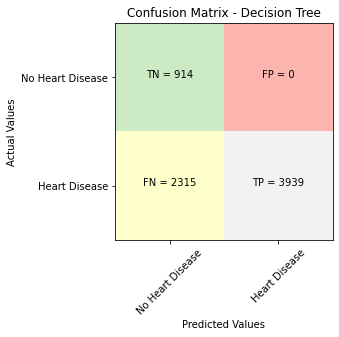

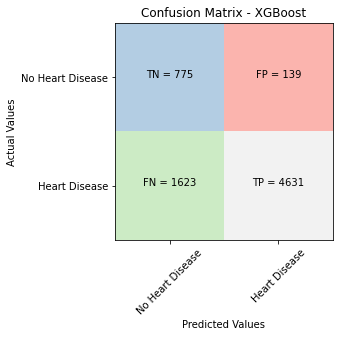

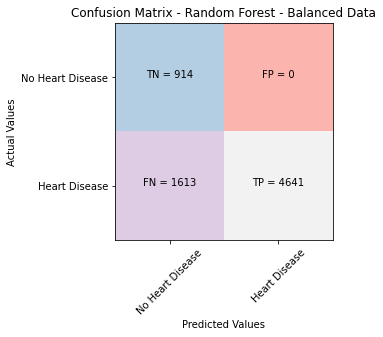

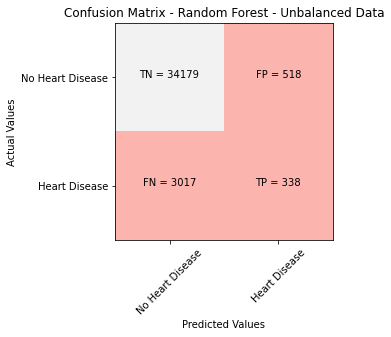

In [22]:
#Confusion Matrix Plot for all Machine Learning Models
print("\nLet us take a look at the confusion matrix of each model (Pop-ups will appear)")

data.plot_confusion_matrix(y_test_b, y_hat1_b, "Decision Tree")

data.plot_confusion_matrix(y_test_b, y_hat2_b, "XGBoost")

data.plot_confusion_matrix(y_test_b, y_hat3_b, "Random Forest - Balanced Data")

data.plot_confusion_matrix(y_test_in, y_hat3_in, "Random Forest - Unbalanced Data")

In [23]:
#Create a list of evalution metrics dictionaries and using it to create a dataframe
list_of_dictionaries=[Decision_Tree_metric_scores, XGBoost_metric_scores, Random_Forest_metric_scores_2]
evaluation_metric_df= pd.DataFrame(list_of_dictionaries, index=['Decision Tree', 'XGBoost', 'Random Forest Classifier'])
evaluation_metric_df

,Accuracy,Precision,Recall,F-1 score
Decision Tree,0.68,1.00,0.63,0.77
XGBoost,0.75,0.97,0.74,0.84
Random Forest Classifier,0.77,1.00,0.74,0.85


In [24]:
#Outputting a file, 'Evaluation_of_each_Model.txt' that contains the evaluation metrics dataframe
print("\nFile with the performance of each model is ready and is output!")


File with the performance of each model is ready and is output!


In [25]:
with open(r'Evaluation_of_each_Model.txt', 'w') as f:
    dfintoString = evaluation_metric_df.to_string()
    f.write(dfintoString)
    f.write("\n\nConsidering the F-1 score, the Random Forest Classifier is the best model at predicting heart diseases.")
    f.close()